<a href="https://colab.research.google.com/github/guebin/IP2023WIN/blob/main/posts/Day2/06_Functions, ControlFlow/2023-01-31-Lesson11.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" style="text-align: left"></a>

# ref

<https://guebin.github.io/DV2022/posts/2022-10-12-6wk-12.html>

# imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# map ($\star$)

`-` 개념: $\text{map}\left(f,[x_1,x_2,\dots,x_n] \right)=\left[f(x_1),f(x_2),\dots,f(x_n) \right] $

`-` 예제1: 

In [166]:
x = [1,2,3] 
f = lambda x: x+1 
y = list(map(f,x))

(다른구현1)

In [136]:
list(map(lambda x: x+1,[1,2,3]))

[2, 3, 4]

(다른구현2)

In [176]:
f = lambda x: x+1 
[f(xi) for xi in [1,2,3]]

[2, 3, 4]

(다른구현3)

In [140]:
[(lambda x: x+1)(xi) for xi in [1,2,3]]

[2, 3, 4]

(다른구현4)--최악

In [178]:
y = [] 
x = [1,2,3] 
f = lambda x: x+1 
for xi in x:
    y.append(f(xi))

In [179]:
y

[2, 3, 4]

(다른구현5)--더 최악

In [143]:
y = [] 
x = [1,2,3] 
f = lambda x: x+1 
for i in range(len(x)):
    y.append(f(x[i]))

In [144]:
y

[2, 3, 4]

**Quiz**

$x=[1,2,3,4,5]$에 대하여 $x^2$을 수행하는 함수를 구현하라. 

`-` 예제2: 문자열을 입력으로 받고 대문자이면 True, 소문자이면 False 
```
입력: A,B,C,a,b,c
출력: T,T,T,F,F,F
```

In [210]:
x= list('ABCabc')
# x = ['A','B','C','a','b','c']
f = lambda s: s.isupper()
y = list(map(f,x))

In [211]:
x,y

(['A', 'B', 'C', 'a', 'b', 'c'], [True, True, True, False, False, False])

`-` 예제3: 두개의 입력을 받는 함수 (map을 이용하는 것이 리스트 컴프리헨션보다 조금 편한것 같다) 

In [268]:
list(map(lambda x,y: x+y, [1,2,3],[-1,-2,-3]))

[0, 0, 0]

(다른구현)-- 리스트컴프리헨션 

In [269]:
f = lambda x,y: x+y 
[f(x,y) for x,y in zip([1,2,3],[-1,-2,-3])] 

[0, 0, 0]

**quiz**

In [216]:
t=np.linspace(-3.14,3.14,100)
x=np.sin(t)
y=np.cos(t)

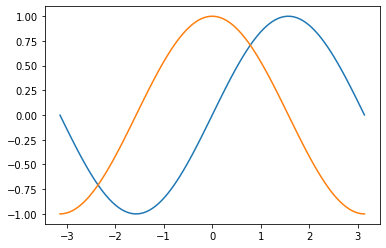

In [218]:
plt.plot(t,x)
plt.plot(t,y)

$f(x,y) = \max(x,y)$ 를 구현하여 ${\bf x}$,${\bf y}$ 각 원소에 적용하고 결과를 시각화 하라. 

In [231]:
f = (lambda x,y: max(x,y))
f(3,4)

4

In [236]:
z= list(map(f,x,y))

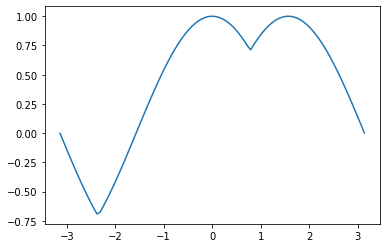

In [238]:
plt.plot(t,z)

`-` 예제4: map은 "하나의 함수에 다양한 입력"을 적용하는 경우에만 사용가능, 리스트컴프리헨션은 "다양한 함수에 다양한 입력" 지원 

In [239]:
flst = [lambda x: x+1, lambda x: x+2, lambda x:x+3] 

map으로 구현시도 $\to$ 실패 

In [259]:
list(map(flst,[-1,-2,-3])) # 결과가 0,0,0

TypeError: 'list' object is not callable

리스트컴프리헨션으로 구현시도 $\to$ 성공 

In [272]:
[f(x) for f,x in zip(flst,[-1,-2,-3])]

[0, 0, 0]

`-` 종합: map과 리스트컴프리헨션과 비교

- map은 for문을 위한 $i$등의 인덱스를 쓰지 않지만 리스트컴프리헨션은 필요함 
- map은 좀더 리스트컴프리헨션보다 제약적으로 사용할 수 밖에 없음. 

# imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

# 복습 

`-` 아래와 같은 정보를 가지는 데이터 프레임을 생성하라. 

||att|rep|mid|fin|
|:-:|:-:|:-:|:-:|:-:|
|0| 65 | 45 | 0 | 10|
|1| 25 | 45 | 20 | 50|
|2| 45 | 45 | 10 | 60|
|3| 35 | 35 | 10 | 80|


In [12]:
df = pd.DataFrame({'att':[65,25,45,35], 'rep':[45,45,45,35], 'mid':[0,20,10,10], 'fin':[10,50,60,80]})
df

,att,rep,mid,fin
0,65,45,0,10
1,25,45,20,50
2,45,45,10,60
3,35,35,10,80


In [15]:
df.to_csv("sample.csv",index=False)
pd.read_csv("sample.csv")

,att,rep,mid,fin
0,65,45,0,10
1,25,45,20,50
2,45,45,10,60
3,35,35,10,80


`-` 이 데이터 프레임을 "sample.csv" 파일로 저장하라. 

**힌트** 아래코드를 이용

```Python
df.to_csv("sample.csv",index=False)
```

`-` 저장된 데이터 프레임을 다시 불러오고 df2로 저장하라. 

**힌트**

```Python
pd.read_csv("sample.csv") 이용 
```

# 판다스: 인덱싱 1단계-- 인덱싱의 4가지 컨셉

## 데이터프레임 준비

`-` 데이터준비

In [17]:
df=pd.read_csv('https://raw.githubusercontent.com/guebin/DV2022/master/posts/dv2022.csv')
df

,att,rep,mid,fin
0,65,45,0,10
1,95,30,60,10
2,65,85,15,20
3,55,35,35,5
4,80,60,55,70
...,...,...,...,...
195,55,70,40,95
196,65,85,25,85
197,85,85,100,10
198,80,65,35,60


`-` 앞으로는 위와 같은 df형태를 가정할 것이다. 즉 column의 이름은 문자열, row의 이름은 0부터 시작하는 정수로 가정한다.    

`-` 아래와 같은 형태는 일단 생각하지 않는다. 

In [21]:
pd.DataFrame({'att':[60,65,80,90],'rep':[50,100,90,100]},index=['규빈','영미','성준','혜미'])

,att,rep
규빈,60,50
영미,65,100
성준,80,90
혜미,90,100


## df의 4가지 컨셉

`-` 원소에 접근하는 4가지 방법: `.`, `[]`, `.iloc[]`, `.loc[]` 

## 컨셉1: 클래스느낌 

`-` 컨셉1: df는 인스턴스이다. 그리고 df.att, df.rep,df.mid, df.fin 와 같이 col이름에 대응하는 속성이 있다. 

In [5]:
df.head()

,att,rep,mid,fin
0,65,45,0,10
1,95,30,60,10
2,65,85,15,20
3,55,35,35,5
4,80,60,55,70


In [294]:
df.fin

0      10
1      10
2      20
3       5
4      70
       ..
195    95
196    85
197    10
198    60
199    85
Name: fin, Length: 200, dtype: int64

`-` 언제유용? col의 이름을 대충 알고 있을 경우 자동완성으로 쉽게 선택가능 

## 컨셉2: 딕셔너리 + $\alpha$ 느낌 

`-` 컨셉2: df는 컬럼이름이 key, 컬럼의데이터가 value가 되는 dictionary로 이해할 수 있다. 즉 아래의 dct와 같은 딕셔너리로 이해할 수 있다. 

In [35]:
dct = dict(df) 
#dct

(예시) .keys() 메소드를 이용하여 컬럼들의 이름을 살펴볼 수 있음.

In [37]:
dct.keys()

dict_keys(['att', 'rep', 'mid', 'fin'])

In [16]:
dct.keys(), df.keys()

(dict_keys(['att', 'rep', 'mid', 'fin']),
 Index(['att', 'rep', 'mid', 'fin'], dtype='object'))

### `#` col indexing 

`-` 예시1: dct가 가능하면 df도 가능하다. 

In [40]:
df['att']
#dct['att'] 

0      65
1      95
2      65
3      55
4      80
       ..
195    55
196    65
197    85
198    80
199    50
Name: att, Length: 200, dtype: int64

`-` 예시2: dct가 가능하면 df도 가능하다. (2)

In [18]:
df.get('att')
#dct.get('att') 

0      65
1      95
2      65
3      55
4      80
       ..
195    55
196    65
197    85
198    80
199    50
Name: att, Length: 200, dtype: int64

`-` 예시3: dct에서 불가능하지만 df에서 가능한것도 있다. 

In [19]:
dct.get(['att','rep'])

TypeError: unhashable type: 'list'

In [20]:
df.get(['att','rep'])

,att,rep
0,65,45
1,95,30
2,65,85
3,55,35
4,80,60
...,...,...
195,55,70
196,65,85
197,85,85
198,80,65


`-` 예시4: dct에서 불가능하지만 df에서 가능한것도 있다. (2)

In [21]:
dct[['att','rep']]

TypeError: unhashable type: 'list'

In [57]:
df[['att','rep']]

,att,rep
0,65,45
1,95,30
2,65,85
3,55,35
4,80,60
...,...,...
195,55,70
196,65,85
197,85,85
198,80,65


### `#` row indexing 

`-` 예시5: dct에서 불가능하지만 df에서 가능한것도 있다. (3)

In [64]:
dct[:5] 

TypeError: unhashable type: 'slice'

In [65]:
df[:5]

,att,rep,mid,fin
0,65,45,0,10
1,95,30,60,10
2,65,85,15,20
3,55,35,35,5
4,80,60,55,70


**Quiz**

1. df의 마지막 열을 출력
2. df의 마지막 행을 출력

## 컨셉3: 넘파이느낌 

`-` 컨셉3: `df.iloc`은 넘파이에러이처럼 생각가능하다. 즉 아래의 arr와 같은 넘파이어레이로 생각가능하다. 

In [71]:
arr = np.array(df)
#arr

### `#` row indexing 

`-` 예시1: 단일레이블 

In [26]:
arr[0,:] # first row 
arr[0,] 
arr[0]

array([65, 45,  0, 10])

In [79]:
df.iloc[0,:] # first row 
df.iloc[0,] 
df.iloc[0]

att    65
rep    45
mid     0
fin    10
Name: 0, dtype: int64

`-` 예시2: 레이블의 리스트

In [28]:
arr[[0,1,2],:] # 처음 3개의 row 선택 
arr[[0,1,2],] 
arr[[0,1,2]]

array([[65, 45,  0, 10],
       [95, 30, 60, 10],
       [65, 85, 15, 20]])

In [29]:
df.iloc[[0,1,2],:] # 처음 3개의 row 선택 
df.iloc[[0,1,2],] 
df.iloc[[0,1,2]]

,att,rep,mid,fin
0,65,45,0,10
1,95,30,60,10
2,65,85,15,20


`-` 예시3: 슬라이싱 

In [352]:
arr[0:3,:] # 처음 3개의 row선택, 끝점포함X
arr[0:3,] 
arr[0:3]

array([[65, 45,  0, 10],
       [95, 30, 60, 10],
       [65, 85, 15, 20]])

In [353]:
df.iloc[0:3,:] # 처음 3개의 row선택, 끝점포함X
df.iloc[0:3,] 
df.iloc[0:3]

,att,rep,mid,fin
0,65,45,0,10
1,95,30,60,10
2,65,85,15,20


### `#` col indexing 

`-` 예시1: 단일레이블 

In [362]:
df.iloc[:,0] # first column 
# arr[:,0] # first column 

0      65
1      95
2      65
3      55
4      80
       ..
195    55
196    65
197    85
198    80
199    50
Name: att, Length: 200, dtype: int64

`-` 예시2: 레이블의 리스트

In [363]:
df.iloc[:,[0,2]] # col1, col3 을 선택
# arr[:,[0,2]] # col1, col3 을 선택

,att,mid
0,65,0
1,95,60
2,65,15
3,55,35
4,80,55
...,...,...
195,55,40
196,65,25
197,85,100
198,80,35


`-` 예시3: 슬라이싱 

In [366]:
df.iloc[:,0:3] # 처음 3개의 col선택, 끝점포함X
#arr[:,0:3]

,att,rep,mid
0,65,45,0
1,95,30,60
2,65,85,15
3,55,35,35
4,80,60,55
...,...,...,...
195,55,70,40
196,65,85,25
197,85,85,100
198,80,65,35


### `#` row + col indexing

In [98]:
df.iloc[::2,:] ## 홀수번째(=짝수인덱스)행을 출력,

,att,rep,mid,fin
0,65,45,0,10
2,65,85,15,20
4,80,60,55,70
6,65,70,60,75
8,95,55,65,90
...,...,...,...,...
190,95,35,40,95
192,100,40,80,80
194,65,40,65,70
196,65,85,25,85


**Quiz**

1. df의 마지막 열을 출력
2. df의 마지막 행을 출력
3. df의 마지막 행의 마지막 열을 출력 
4. df의 짝수번째 열을 출력 

## 컨셉4: 데이터프레임 느낌 

`-` 컨셉4: `df.loc`은 새로운 느낌.. 

### `#` row indexing

`-` 예시1: 단일레이블 

In [111]:
df.loc[0,:] # 첫번째 row를 선택 
df.loc[0,]
df.loc[0] 

att    65
rep    45
mid     0
fin    10
Name: 0, dtype: int64

`-` 예시2: 레이블의 리스트 

In [112]:
df.loc[[0,1,2],:] # 처음 3개의 row를 선택 
df.loc[[0,1,2],]
df.loc[[0,1,2]] 

,att,rep,mid,fin
0,65,45,0,10
1,95,30,60,10
2,65,85,15,20


`-` 예시3: 슬라이싱 (끝점포함 O)

In [114]:
df.loc[0:3,:] # 처음 4개의 row를 선택, 끝점포함 
df.loc[0:3,]
df.loc[0:3] 

,att,rep,mid,fin
0,65,45,0,10
1,95,30,60,10
2,65,85,15,20
3,55,35,35,5


**Quiz**

2번째 row부터 5번째 row까지 출력하라. loc과 iloc으로 각각 출력해볼 것 (슬라이싱을 이용) 

### `#` col indexing 

`-` 예시1: 단일레이블 

In [393]:
df.loc[:,'att'] 

0      65
1      95
2      65
3      55
4      80
       ..
195    55
196    65
197    85
198    80
199    50
Name: att, Length: 200, dtype: int64

`-` 예시2: 레이블의 리스트

In [394]:
df.loc[:,['att','mid']] 

,att,mid
0,65,0
1,95,60
2,65,15
3,55,35
4,80,55
...,...,...
195,55,40
196,65,25
197,85,100
198,80,35


`-` 예시3: 슬라이싱 (끝점포함 O)

In [395]:
df.loc[:,'att':'mid'] # 끝점포함 

,att,rep,mid
0,65,45,0
1,95,30,60
2,65,85,15
3,55,35,35
4,80,60,55
...,...,...,...
195,55,70,40
196,65,85,25
197,85,85,100
198,80,65,35


### `#` row + col indexing 

In [404]:
df.loc[::-1,'att':'mid'] # 끝점포함 

,att,rep,mid
199,50,95,45
198,80,65,35
197,85,85,100
196,65,85,25
195,55,70,40
...,...,...,...
4,80,60,55
3,55,35,35
2,65,85,15
1,95,30,60


**Quiz**

출석점수의 짝수번째 row를 출력하라. 

## 컨셉1~4 정리 

||`.`| `[]` | `.iloc` | `.loc`| 
|:-:|:-:|:-:|:-:|:-:|
|row/단일레이블|X|X|O|O|
|col/단일레이블|O|O|O|O|
|row/레이블리스트|X|X|O|O|
|col/레이블리스트|X|O|O|O|
|row/슬라이싱|X|O|O|O|
|col/슬라이싱|X|X|O|O|

`-` col 이름을 알아야하는 부담감
- `.` : 앞글자만 대충 알아도 자동완성 가능 
- `[]`: 정확한 col 이름을 알아야 함
- `.loc`: 보통 정확한 col 이름을 알아야 하지만 슬라이싱 이용시 양 끝의 컬럼이름만 알면 무방 
- `.iloc`: 정확한 col 이름을 몰라도 번호로 인덱싱 가능

`-` 자주하는 실수 

In [134]:
df['att'] # 가능 
# df.loc['att'] # 불가능
df.loc[:,'att'] # 가능

0      65
1      95
2      65
3      55
4      80
       ..
195    55
196    65
197    85
198    80
199    50
Name: att, Length: 200, dtype: int64

# 판다스: 인덱싱 2단계-- 필터링(특정조건에 맞는 row를 선택) 

## att > 90 and rep < 50 

`-` 방법1: .query()를 이용

In [138]:
df.query('att>90 and rep<50')

,att,rep,mid,fin
1,95,30,60,10
12,95,35,0,25
48,95,45,35,80
56,95,25,95,90
78,95,45,90,35
107,100,30,60,65
112,100,35,70,0
113,95,45,55,65
163,100,25,10,20
174,100,40,40,15


In [139]:
df.query('(att>90)&(rep<50)') 

,att,rep,mid,fin
1,95,30,60,10
12,95,35,0,25
48,95,45,35,80
56,95,25,95,90
78,95,45,90,35
107,100,30,60,65
112,100,35,70,0
113,95,45,55,65
163,100,25,10,20
174,100,40,40,15


In [141]:
df.query('att>90 & rep<50') 

,att,rep,mid,fin
1,95,30,60,10
12,95,35,0,25
48,95,45,35,80
56,95,25,95,90
78,95,45,90,35
107,100,30,60,65
112,100,35,70,0
113,95,45,55,65
163,100,25,10,20
174,100,40,40,15


`-` 방법2: [], `.iloc`, `.loc`

(예비학습)

In [47]:
True&True, True&False, False&True, False&False

(True, False, False, False)

In [48]:
True|True, True|False, False|True, False|False

(True, True, True, False)

In [147]:
(df.att>90) & (df.rep<50)

0      False
1       True
2      False
3      False
4      False
       ...  
195    False
196    False
197    False
198    False
199    False
Length: 200, dtype: bool

예비학습 끝 

In [51]:
df[(df.att > 90)&(df.rep < 50)]
df.loc[(df.att > 90)&(df.rep < 50)]
df.iloc[list((df.att > 90)&(df.rep < 50))]

,att,rep,mid,fin
1,95,30,60,10
12,95,35,0,25
48,95,45,35,80
56,95,25,95,90
78,95,45,90,35
107,100,30,60,65
112,100,35,70,0
113,95,45,55,65
163,100,25,10,20
174,100,40,40,15


`-` 방법3: [], `.iloc`, `.loc` // map, lambda 

In [157]:
df.att > 90

0      False
1       True
2      False
3      False
4      False
       ...  
195    False
196    False
197    False
198    False
199    False
Name: att, Length: 200, dtype: bool

In [169]:
df[list(map(lambda x,y: (x>90)&(y<50), df.att, df.rep))]
# df[map(lambda x,y: (x>90)&(y<50), df.att, df.rep)] # 이것은 불가능

,att,rep,mid,fin
1,95,30,60,10
12,95,35,0,25
48,95,45,35,80
56,95,25,95,90
78,95,45,90,35
107,100,30,60,65
112,100,35,70,0
113,95,45,55,65
163,100,25,10,20
174,100,40,40,15


In [497]:
df.iloc[list(map(lambda x,y: (x>90)&(y<50), df.att, df.rep))]
df.iloc[map(lambda x,y: (x>90)&(y<50), df.att, df.rep)]

,att,rep,mid,fin
1,95,30,60,10
12,95,35,0,25
48,95,45,35,80
56,95,25,95,90
78,95,45,90,35
107,100,30,60,65
112,100,35,70,0
113,95,45,55,65
163,100,25,10,20
174,100,40,40,15


In [496]:
df.loc[list(map(lambda x,y: (x>90)&(y<50), df.att, df.rep))]
df.loc[map(lambda x,y: (x>90)&(y<50), df.att, df.rep)]

,att,rep,mid,fin
1,95,30,60,10
12,95,35,0,25
48,95,45,35,80
56,95,25,95,90
78,95,45,90,35
107,100,30,60,65
112,100,35,70,0
113,95,45,55,65
163,100,25,10,20
174,100,40,40,15


## att > mean(att)

`-` 방법1: .query()를 이용

In [507]:
df.query('att> att.mean()') 

,att,rep,mid,fin
1,95,30,60,10
4,80,60,55,70
8,95,55,65,90
9,90,25,95,50
11,95,60,25,55
...,...,...,...,...
184,100,30,30,85
190,95,35,40,95
192,100,40,80,80
197,85,85,100,10


`-` 방법2: [], `.iloc`, `.loc`

In [506]:
df[df.att > df.att.mean()]
df.loc[df.att > df.att.mean()]
df.iloc[list(df.att > df.att.mean())]

,att,rep,mid,fin
1,95,30,60,10
4,80,60,55,70
8,95,55,65,90
9,90,25,95,50
11,95,60,25,55
...,...,...,...,...
184,100,30,30,85
190,95,35,40,95
192,100,40,80,80
197,85,85,100,10


`-` 방법3: [], `.iloc`, `.loc` // map, lambda 

In [513]:
df[list(map(lambda x: x>df.att.mean() , df.att))]
# df[map(lambda x: x>df.att.mean() , df.att)] # 이것은 불가능

,att,rep,mid,fin
1,95,30,60,10
4,80,60,55,70
8,95,55,65,90
9,90,25,95,50
11,95,60,25,55
...,...,...,...,...
184,100,30,30,85
190,95,35,40,95
192,100,40,80,80
197,85,85,100,10


In [514]:
df.iloc[list(map(lambda x: x>df.att.mean() , df.att))]
df.iloc[map(lambda x: x>df.att.mean() , df.att)]

,att,rep,mid,fin
1,95,30,60,10
4,80,60,55,70
8,95,55,65,90
9,90,25,95,50
11,95,60,25,55
...,...,...,...,...
184,100,30,30,85
190,95,35,40,95
192,100,40,80,80
197,85,85,100,10


In [515]:
df.loc[list(map(lambda x: x>df.att.mean() , df.att))]
df.loc[map(lambda x: x>df.att.mean() , df.att)]

,att,rep,mid,fin
1,95,30,60,10
4,80,60,55,70
8,95,55,65,90
9,90,25,95,50
11,95,60,25,55
...,...,...,...,...
184,100,30,30,85
190,95,35,40,95
192,100,40,80,80
197,85,85,100,10


||`.`| `[]` | `.iloc` | `.loc`| 
|:-:|:-:|:-:|:-:|:-:|
|row/단일레이블|X|X|O|O|
|col/단일레이블|O|O|O|O|
|row/레이블리스트|X|X|O|O|
|col/레이블리스트|X|O|O|O|
|row/슬라이싱|X|O|O|O|
|col/슬라이싱|X|X|O|O|
|row/bool,list|X|O|O|O|
|row/bool,ser|X|O|X|O|
|row/bool,map|X|X|O|O|

**Quiz**

아래와 같은 데이터 프레임을 만들어라. 

||name|score|
|:-:|:-:|:-:|
|0| Guebin| 50 |
|1| Jaein | 60 |
|2| Daho | 70 |
|3| Seoyeon | 80 |


이름이 5글자 이상이고 점수가 55점 이상한 학생을 출력하라. 

In [208]:
df=pd.DataFrame({'name':['Guebin','Jaein','Daho','Seoyeon'],'score':[50,60,70,80]})
df

,name,score
0,Guebin,50
1,Jaein,60
2,Daho,70
3,Seoyeon,80


In [195]:
df[list(map((lambda name,score: (len(name) >= 5)& (score>55)),df.name,df.score))]

,name,score
1,Jaein,60
3,Seoyeon,80


# 판다스: 인덱싱 3단계-- column의 선택 (with 실전예제)

## 데이터

In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/PacktPublishing/Pandas-Cookbook/master/data/movie.csv')
df

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4911,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
4912,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
4913,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
4914,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


**Quiz** 열의 이름을 출력하여 보자. 

## 기본인덱싱 (df 인덱싱공부 1단계 내용)

`-` color ~ num_voted_user 를 뽑고 + aspect_ratio 도 추가적으로 뽑고싶다. -> loc으로는 못하겠어요..

In [5]:
df.loc[:,['color':'num_voted_users','aspect_ratio']]

SyntaxError: invalid syntax (1210972629.py, line 1)

`-` (팁) 복잡한 조건은 iloc으로 쓰는게 편할때가 있다. $\to$ 그런데 `df.columns` 변수들이 몇번인지 알아보기 힘듬 $\to$ 아래와 같이 하면 열의 이름을 인덱스와 함께 출력할 수 있음 

In [6]:
pd.Series(df.columns)

0                         color
1                 director_name
2        num_critic_for_reviews
3                      duration
4       director_facebook_likes
5        actor_3_facebook_likes
6                  actor_2_name
7        actor_1_facebook_likes
8                         gross
9                        genres
10                 actor_1_name
11                  movie_title
12              num_voted_users
13    cast_total_facebook_likes
14                 actor_3_name
15         facenumber_in_poster
16                plot_keywords
17              movie_imdb_link
18         num_user_for_reviews
19                     language
20                      country
21               content_rating
22                       budget
23                   title_year
24       actor_2_facebook_likes
25                   imdb_score
26                 aspect_ratio
27         movie_facebook_likes
dtype: object

In [7]:
list(range(13))+[26]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 26]

In [8]:
df.iloc[:,list(range(13))+[26]] 

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,aspect_ratio
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,1.78
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,2.35
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,2.35
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,2.35
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens,8,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4911,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,Eric Mabius,Signed Sealed Delivered,629,NaN
4912,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,Natalie Zea,The Following,73839,16.00
4913,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,Eva Boehnke,A Plague So Pleasant,38,NaN
4914,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,Alan Ruck,Shanghai Calling,1255,2.35


## actor라는 단어가 포함된 column 선택 

`-` 다시 열의 이름들을 확인 

In [9]:
df.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

`-` 방법1

In [10]:
df.iloc[:,list(map(lambda x : 'actor' in x, df.columns) )]

,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,actor_1_name,actor_3_name,actor_2_facebook_likes
0,855.0,Joel David Moore,1000.0,CCH Pounder,Wes Studi,936.0
1,1000.0,Orlando Bloom,40000.0,Johnny Depp,Jack Davenport,5000.0
2,161.0,Rory Kinnear,11000.0,Christoph Waltz,Stephanie Sigman,393.0
3,23000.0,Christian Bale,27000.0,Tom Hardy,Joseph Gordon-Levitt,23000.0
4,NaN,Rob Walker,131.0,Doug Walker,NaN,12.0
...,...,...,...,...,...,...
4911,318.0,Daphne Zuniga,637.0,Eric Mabius,Crystal Lowe,470.0
4912,319.0,Valorie Curry,841.0,Natalie Zea,Sam Underwood,593.0
4913,0.0,Maxwell Moody,0.0,Eva Boehnke,David Chandler,0.0
4914,489.0,Daniel Henney,946.0,Alan Ruck,Eliza Coupe,719.0


`-` 방법2

In [11]:
df.loc[:,list(map(lambda x : 'actor' in x, df.columns) )]

,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,actor_1_name,actor_3_name,actor_2_facebook_likes
0,855.0,Joel David Moore,1000.0,CCH Pounder,Wes Studi,936.0
1,1000.0,Orlando Bloom,40000.0,Johnny Depp,Jack Davenport,5000.0
2,161.0,Rory Kinnear,11000.0,Christoph Waltz,Stephanie Sigman,393.0
3,23000.0,Christian Bale,27000.0,Tom Hardy,Joseph Gordon-Levitt,23000.0
4,NaN,Rob Walker,131.0,Doug Walker,NaN,12.0
...,...,...,...,...,...,...
4911,318.0,Daphne Zuniga,637.0,Eric Mabius,Crystal Lowe,470.0
4912,319.0,Valorie Curry,841.0,Natalie Zea,Sam Underwood,593.0
4913,0.0,Maxwell Moody,0.0,Eva Boehnke,David Chandler,0.0
4914,489.0,Daniel Henney,946.0,Alan Ruck,Eliza Coupe,719.0


`-` 방법3

In [12]:
df.iloc[:,map(lambda x : 'actor' in x, df.columns)]

,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,actor_1_name,actor_3_name,actor_2_facebook_likes
0,855.0,Joel David Moore,1000.0,CCH Pounder,Wes Studi,936.0
1,1000.0,Orlando Bloom,40000.0,Johnny Depp,Jack Davenport,5000.0
2,161.0,Rory Kinnear,11000.0,Christoph Waltz,Stephanie Sigman,393.0
3,23000.0,Christian Bale,27000.0,Tom Hardy,Joseph Gordon-Levitt,23000.0
4,NaN,Rob Walker,131.0,Doug Walker,NaN,12.0
...,...,...,...,...,...,...
4911,318.0,Daphne Zuniga,637.0,Eric Mabius,Crystal Lowe,470.0
4912,319.0,Valorie Curry,841.0,Natalie Zea,Sam Underwood,593.0
4913,0.0,Maxwell Moody,0.0,Eva Boehnke,David Chandler,0.0
4914,489.0,Daniel Henney,946.0,Alan Ruck,Eliza Coupe,719.0


`-` 방법4

In [13]:
df.loc[:,map(lambda x : 'actor' in x, df.columns)]

,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,actor_1_name,actor_3_name,actor_2_facebook_likes
0,855.0,Joel David Moore,1000.0,CCH Pounder,Wes Studi,936.0
1,1000.0,Orlando Bloom,40000.0,Johnny Depp,Jack Davenport,5000.0
2,161.0,Rory Kinnear,11000.0,Christoph Waltz,Stephanie Sigman,393.0
3,23000.0,Christian Bale,27000.0,Tom Hardy,Joseph Gordon-Levitt,23000.0
4,NaN,Rob Walker,131.0,Doug Walker,NaN,12.0
...,...,...,...,...,...,...
4911,318.0,Daphne Zuniga,637.0,Eric Mabius,Crystal Lowe,470.0
4912,319.0,Valorie Curry,841.0,Natalie Zea,Sam Underwood,593.0
4913,0.0,Maxwell Moody,0.0,Eva Boehnke,David Chandler,0.0
4914,489.0,Daniel Henney,946.0,Alan Ruck,Eliza Coupe,719.0


## s로 끝나는 column 선택 

`-` 방법1

In [14]:
df.iloc[:,map(lambda x: 's' == x[-1],df.columns )]

,num_critic_for_reviews,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,genres,num_voted_users,cast_total_facebook_likes,plot_keywords,num_user_for_reviews,actor_2_facebook_likes,movie_facebook_likes
0,723.0,0.0,855.0,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,886204,4834,avatar|future|marine|native|paraplegic,3054.0,936.0,33000
1,302.0,563.0,1000.0,40000.0,309404152.0,Action|Adventure|Fantasy,471220,48350,goddess|marriage ceremony|marriage proposal|pi...,1238.0,5000.0,0
2,602.0,0.0,161.0,11000.0,200074175.0,Action|Adventure|Thriller,275868,11700,bomb|espionage|sequel|spy|terrorist,994.0,393.0,85000
3,813.0,22000.0,23000.0,27000.0,448130642.0,Action|Thriller,1144337,106759,deception|imprisonment|lawlessness|police offi...,2701.0,23000.0,164000
4,NaN,131.0,NaN,131.0,NaN,Documentary,8,143,NaN,NaN,12.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4911,1.0,2.0,318.0,637.0,NaN,Comedy|Drama,629,2283,fraud|postal worker|prison|theft|trial,6.0,470.0,84
4912,43.0,NaN,319.0,841.0,NaN,Crime|Drama|Mystery|Thriller,73839,1753,cult|fbi|hideout|prison escape|serial killer,359.0,593.0,32000
4913,13.0,0.0,0.0,0.0,NaN,Drama|Horror|Thriller,38,0,NaN,3.0,0.0,16
4914,14.0,0.0,489.0,946.0,10443.0,Comedy|Drama|Romance,1255,2386,NaN,9.0,719.0,660


`-` 방법2

In [15]:
df.loc[:,map(lambda x: 's' == x[-1],df.columns )]

,num_critic_for_reviews,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,genres,num_voted_users,cast_total_facebook_likes,plot_keywords,num_user_for_reviews,actor_2_facebook_likes,movie_facebook_likes
0,723.0,0.0,855.0,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,886204,4834,avatar|future|marine|native|paraplegic,3054.0,936.0,33000
1,302.0,563.0,1000.0,40000.0,309404152.0,Action|Adventure|Fantasy,471220,48350,goddess|marriage ceremony|marriage proposal|pi...,1238.0,5000.0,0
2,602.0,0.0,161.0,11000.0,200074175.0,Action|Adventure|Thriller,275868,11700,bomb|espionage|sequel|spy|terrorist,994.0,393.0,85000
3,813.0,22000.0,23000.0,27000.0,448130642.0,Action|Thriller,1144337,106759,deception|imprisonment|lawlessness|police offi...,2701.0,23000.0,164000
4,NaN,131.0,NaN,131.0,NaN,Documentary,8,143,NaN,NaN,12.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4911,1.0,2.0,318.0,637.0,NaN,Comedy|Drama,629,2283,fraud|postal worker|prison|theft|trial,6.0,470.0,84
4912,43.0,NaN,319.0,841.0,NaN,Crime|Drama|Mystery|Thriller,73839,1753,cult|fbi|hideout|prison escape|serial killer,359.0,593.0,32000
4913,13.0,0.0,0.0,0.0,NaN,Drama|Horror|Thriller,38,0,NaN,3.0,0.0,16
4914,14.0,0.0,489.0,946.0,10443.0,Comedy|Drama|Romance,1255,2386,NaN,9.0,719.0,660


## c 혹은 d로 시작하는 column 선택

`-` 방법1

In [16]:
df.iloc[:,map(lambda x: 'c' == x[0] or 'd' == x[0] ,df.columns )]

,color,director_name,duration,director_facebook_likes,cast_total_facebook_likes,country,content_rating
0,Color,James Cameron,178.0,0.0,4834,USA,PG-13
1,Color,Gore Verbinski,169.0,563.0,48350,USA,PG-13
2,Color,Sam Mendes,148.0,0.0,11700,UK,PG-13
3,Color,Christopher Nolan,164.0,22000.0,106759,USA,PG-13
4,NaN,Doug Walker,NaN,131.0,143,NaN,NaN
...,...,...,...,...,...,...,...
4911,Color,Scott Smith,87.0,2.0,2283,Canada,NaN
4912,Color,NaN,43.0,NaN,1753,USA,TV-14
4913,Color,Benjamin Roberds,76.0,0.0,0,USA,NaN
4914,Color,Daniel Hsia,100.0,0.0,2386,USA,PG-13


`-` 방법2

In [17]:
df.loc[:,map(lambda x: 'c' == x[0] or 'd' == x[0] ,df.columns )]

,color,director_name,duration,director_facebook_likes,cast_total_facebook_likes,country,content_rating
0,Color,James Cameron,178.0,0.0,4834,USA,PG-13
1,Color,Gore Verbinski,169.0,563.0,48350,USA,PG-13
2,Color,Sam Mendes,148.0,0.0,11700,UK,PG-13
3,Color,Christopher Nolan,164.0,22000.0,106759,USA,PG-13
4,NaN,Doug Walker,NaN,131.0,143,NaN,NaN
...,...,...,...,...,...,...,...
4911,Color,Scott Smith,87.0,2.0,2283,Canada,NaN
4912,Color,NaN,43.0,NaN,1753,USA,TV-14
4913,Color,Benjamin Roberds,76.0,0.0,0,USA,NaN
4914,Color,Daniel Hsia,100.0,0.0,2386,USA,PG-13


**quiz** 

1. column이름에 `_`가 포함되어있는 열을 모두 출력하라. 
2. column이름에 `_`가 포함되어있는 열은 모두 몇개인가? 

# 판다스: 새로운 열의 할당 1단계

## 방법1: concat

In [122]:
df = pd.DataFrame({'a':[1,2,3],'b':[2,3,4]})
df

,a,b
0,1,2
1,2,3
2,3,4


In [123]:
_df = pd.DataFrame({'c':[3,4,5]}) 
_df

,c
0,3
1,4
2,5


In [124]:
pd.concat([df,_df],axis=1)

,a,b,c
0,1,2,3
1,2,3,4
2,3,4,5


## 방법2: 4가지 컨셉에 따른 할당 

### `#` 컨셉1: 불가능 

In [125]:
df = pd.DataFrame({'a':[1,2,3],'b':[2,3,4]})
df

,a,b
0,1,2
1,2,3
2,3,4


In [126]:
df.c = pd.Series([1,2,3]) 
df

/home/cgb2/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


,a,b
0,1,2
1,2,3
2,3,4


### `#` 컨셉2: 가능

(예시1)

In [127]:
df = pd.DataFrame({'a':[1,2,3],'b':[2,3,4]})
df

,a,b
0,1,2
1,2,3
2,3,4


In [128]:
df['c']=[3,4,5]
df

,a,b,c
0,1,2,3
1,2,3,4
2,3,4,5


(예시2)

In [129]:
df = pd.DataFrame({'a':[1,2,3],'b':[2,3,4]})
df

,a,b
0,1,2
1,2,3
2,3,4


In [130]:
df[['c','d']]=np.array([[3,4,5],[4,5,6]]).T # 굳이.. 
df

,a,b,c,d
0,1,2,3,4
1,2,3,4,5
2,3,4,5,6


(예시3)

In [131]:
df = pd.DataFrame({'a':[1,2,3],'b':[2,3,4]})
df

,a,b
0,1,2
1,2,3
2,3,4


In [132]:
df['c'],df['d']=[3,4,5],[4,5,6]
df

,a,b,c,d
0,1,2,3,4
1,2,3,4,5
2,3,4,5,6


### `#` 컨셉3: 불가능

(예시1)

In [133]:
df = pd.DataFrame({'a':[1,2,3],'b':[2,3,4]})
df

,a,b
0,1,2
1,2,3
2,3,4


In [134]:
df.iloc[:,2] = [3,4,5] 
df

IndexError: iloc cannot enlarge its target object

### `#` 컨셉4: 가능

(예시1)

In [135]:
df = pd.DataFrame({'a':[1,2,3],'b':[2,3,4]})
df

,a,b
0,1,2
1,2,3
2,3,4


In [136]:
df.loc[:,'c'] = [3,4,5] 
df

,a,b,c
0,1,2,3
1,2,3,4
2,3,4,5


(예시2)

In [137]:
df = pd.DataFrame({'a':[1,2,3],'b':[2,3,4]})
df

,a,b
0,1,2
1,2,3
2,3,4


In [138]:
df.loc[:,['c','d']] = np.array([[3,4,5],[4,5,6]]).T # 이거 솔직히 되는지 몰랐어요.. 
df

,a,b,c,d
0,1,2,3,4
1,2,3,4,5
2,3,4,5,6


(예시3)

In [139]:
df = pd.DataFrame({'a':[1,2,3],'b':[2,3,4]})
df

,a,b
0,1,2
1,2,3
2,3,4


In [140]:
df.loc[:,'c'],df.loc[:,'d'] = [3,4,5],[4,5,6] 
df

,a,b,c,d
0,1,2,3,4
1,2,3,4,5
2,3,4,5,6


## 방법3: `.assign`으로 할당 ($\star$) -- 제 최애 

In [141]:
df = pd.DataFrame({'a':[1,2,3],'b':[2,3,4]})
df

,a,b
0,1,2
1,2,3
2,3,4


In [142]:
df.assign(c=[3,4,5])

,a,b,c
0,1,2,3
1,2,3,4
2,3,4,5


In [143]:
df.assign(c=[3,4,5],d=[4,5,6])

,a,b,c,d
0,1,2,3,4
1,2,3,4,5
2,3,4,5,6


In [144]:
df.assign(c=[3,4,5]).assign(d=[4,5,6])

,a,b,c,d
0,1,2,3,4
1,2,3,4,5
2,3,4,5,6


## 방법4: `.eval`을 이용한 할당 

In [145]:
df = pd.DataFrame({'a':[1,2,3],'b':[2,3,4]})
df

,a,b
0,1,2
1,2,3
2,3,4


In [146]:
df.eval('c=[3,4,5]')

,a,b,c
0,1,2,3
1,2,3,4
2,3,4,5


In [147]:
df.eval('c=[3,4,5]').eval('d=[4,5,6]')

,a,b,c,d
0,1,2,3,4
1,2,3,4,5
2,3,4,5,6


## 연습해보기 

### `#` 데이터프레임 생성 

In [111]:
df=pd.DataFrame({'x':np.random.randn(1000),'y':np.random.randn(1000)})
df

,x,y
0,-0.813856,0.635606
1,0.457182,0.334678
2,-0.473772,-1.169757
3,-0.273939,-1.044208
4,-0.619499,-0.356150
...,...,...
995,0.205837,0.422563
996,-0.058614,0.478894
997,1.874445,0.057198
998,-0.376114,1.574681


### `#` 새로운열 `r`을 생성하고 $r=\sqrt{x^2 + y^2}$를 계산

`-` 방법1: 브로드캐스팅

In [112]:
df.assign(r=np.sqrt(df.x**2 + df.y**2))

,x,y,r
0,-0.813856,0.635606,1.032645
1,0.457182,0.334678,0.566591
2,-0.473772,-1.169757,1.262058
3,-0.273939,-1.044208,1.079542
4,-0.619499,-0.356150,0.714578
...,...,...,...
995,0.205837,0.422563,0.470030
996,-0.058614,0.478894,0.482468
997,1.874445,0.057198,1.875318
998,-0.376114,1.574681,1.618976


`-` 방법2: (**quiz**) lambda + map을 이용한 개별원소 계산

`-` 방법3: eval 

In [114]:
df.eval('r=sqrt(x**2+y**2)')

,x,y,r
0,-0.813856,0.635606,1.032645
1,0.457182,0.334678,0.566591
2,-0.473772,-1.169757,1.262058
3,-0.273939,-1.044208,1.079542
4,-0.619499,-0.356150,0.714578
...,...,...,...
995,0.205837,0.422563,0.470030
996,-0.058614,0.478894,0.482468
997,1.874445,0.057198,1.875318
998,-0.376114,1.574681,1.618976


# 판다스: 새로운 열의 할당 2단계 (연쇄할당) 

## 모티브 

`-` 원본데이터를 가급적 손상시키지 않으면서 데이터를 변형하고 싶음. 

In [3]:
df = pd.DataFrame({'A':range(0,5),'B':range(1,6)})
df

,A,B
0,0,1
1,1,2
2,2,3
3,3,4
4,4,5


복사본 생성 

In [4]:
df2 = df 
df2

,A,B
0,0,1
1,1,2
2,2,3
3,3,4
4,4,5


In [5]:
df2['C'] = (df2.A+ df2.B)/2
df2

,A,B,C
0,0,1,0.5
1,1,2,1.5
2,2,3,2.5
3,3,4,3.5
4,4,5,4.5


In [6]:
df2['D']= (df2.C - np.mean(df2.C))/np.std(df2.C) 
df2

,A,B,C,D
0,0,1,0.5,-1.414214
1,1,2,1.5,-0.707107
2,2,3,2.5,0.000000
3,3,4,3.5,0.707107
4,4,5,4.5,1.414214


In [7]:
df # 니가 왜 거기서 나와??

,A,B,C,D
0,0,1,0.5,-1.414214
1,1,2,1.5,-0.707107
2,2,3,2.5,0.000000
3,3,4,3.5,0.707107
4,4,5,4.5,1.414214


## 해결책1: df.copy()이용, .eval()이용

`-` 올바른코드1

In [8]:
df = pd.DataFrame({'A':range(0,5),'B':range(1,6)})
df2 = df.copy() 
df2['C'] = (df2.A+ df2.B)/2
df2['D']= (df2.C - np.mean(df2.C))/np.std(df2.C) 

In [9]:
df2

,A,B,C,D
0,0,1,0.5,-1.414214
1,1,2,1.5,-0.707107
2,2,3,2.5,0.000000
3,3,4,3.5,0.707107
4,4,5,4.5,1.414214


In [10]:
df

,A,B
0,0,1
1,1,2
2,2,3
3,3,4
4,4,5


`-` 올바른코드2

In [30]:
df = pd.DataFrame({'A':range(0,5),'B':range(1,6)})
mean = np.mean 
std = np.std 
df.eval('C=(A+B)/2').eval('D=(C-@mean(C))/@std(C)')

,A,B,C,D
0,0,1,0.5,-1.414214
1,1,2,1.5,-0.707107
2,2,3,2.5,0.000000
3,3,4,3.5,0.707107
4,4,5,4.5,1.414214


- 어디까지 eval expression 안에서 지원되는지 명확하지 않고
- 외부에 함수를 선언하고 eval expression 안에 @를 붙이는게 좀 귀찮음 

`-` 올바른코드3 (assign) --> 실패

In [31]:
df = pd.DataFrame({'A':range(0,5),'B':range(1,6)})
df.assign(C= (df.A+df.B)/2) 

,A,B,C
0,0,1,0.5
1,1,2,1.5
2,2,3,2.5
3,3,4,3.5
4,4,5,4.5


In [32]:
df.assign(C= (df.A+df.B)/2).assign(D= (df.C- np.mean(df.C))/np.std(df.C))

AttributeError: 'DataFrame' object has no attribute 'C'

아래와 같이 고쳐야함 

In [39]:
_df = df.assign(C= (df.A+df.B)/2)
_df.assign(D= (_df.C- np.mean(_df.C))/np.std(_df.C))

,A,B,C,D
0,0,1,0.5,-1.414214
1,1,2,1.5,-0.707107
2,2,3,2.5,0.000000
3,3,4,3.5,0.707107
4,4,5,4.5,1.414214


- 이건 우리의 철학이랑 안맞음.. 

## 해결책2: assign을 이용한 연쇄할당  

실패한코드는 아래와 같다. 

In [44]:
df.assign(C= (df.A+df.B)/2).assign(D= (df.C- np.mean(df.C))/np.std(df.C))

AttributeError: 'DataFrame' object has no attribute 'C'

두번째 assign에서 표현된 df.C 에서, df가 `current df` (= `df.assign(C= (df.A+df.B)/2)` 까지 연산된 상태) 를 의미하도록 만들고 싶다. $\to$ 아래와 같이 `lambda df:` 를 추가하면 된다. 

In [49]:
df.assign(C= (df.A+df.B)/2).assign(D= lambda df: (df.C- np.mean(df.C))/np.std(df.C))

,A,B,C,D
0,0,1,0.5,-1.414214
1,1,2,1.5,-0.707107
2,2,3,2.5,0.000000
3,3,4,3.5,0.707107
4,4,5,4.5,1.414214


`-` 연쇄할당 

In [55]:
df.assign(C = (df.A+df.B)/2).assign(D = lambda df: df.C +2).assign(E = lambda df: df.D - 2)

,A,B,C,D,E
0,0,1,0.5,2.5,0.5
1,1,2,1.5,3.5,1.5
2,2,3,2.5,4.5,2.5
3,3,4,3.5,5.5,3.5
4,4,5,4.5,6.5,4.5


# Quiz

다음과 같은 데이터프레임을 불러온 뒤 물음에 답하라 

In [518]:
df=pd.read_csv('https://raw.githubusercontent.com/guebin/DV2022/master/_notebooks/dv2022.csv')
df

,att,rep,mid,fin
0,65,45,0,10
1,95,30,60,10
2,65,85,15,20
3,55,35,35,5
4,80,60,55,70
...,...,...,...,...
195,55,70,40,95
196,65,85,25,85
197,85,85,100,10
198,80,65,35,60


`(1)` 기말고사 성적이 중간고사 성적보다 향상된 학생들을 출력하라. 즉 mid < fin 인 학생들을 출력하라. (다양한 방법으로 연습할 것, 제출은 한 가지 방법으로 구현해도 감점없음) 

In [521]:
# 구현결과가 아래와 같아야 한다. 

,att,rep,mid,fin
0,65,45,0,10
2,65,85,15,20
4,80,60,55,70
5,75,40,75,85
6,65,70,60,75
...,...,...,...,...
194,65,40,65,70
195,55,70,40,95
196,65,85,25,85
198,80,65,35,60


`(2)` 기말고사 성적이 중간고사 성적보다 향상된 학생들의 출석과 레포트 점수를 출력하라. 

In [523]:
# 구현결과가 아래와 같아야 한다. 

,att,rep
0,65,45
2,65,85
4,80,60
5,75,40
6,65,70
...,...,...
194,65,40
195,55,70
196,65,85
198,80,65


In [64]:
df = pd.DataFrame({'a':[1,2,3,4],'b':[2,3,4,5],'c':[3,4,5,6],'d':[4,5,6,7]})
df

,a,b,c,d
0,1,2,3,4
1,2,3,4,5
2,3,4,5,6
3,4,5,6,7


## `2`.

아래의 결과를 관찰하고 drop의 기능을 유추하라. 

(예시1)

In [65]:
df.drop(columns='a')

,b,c,d
0,2,3,4
1,3,4,5
2,4,5,6
3,5,6,7


(예시2)

In [66]:
df.drop(columns=['a','b'])

,c,d
0,3,4
1,4,5
2,5,6
3,6,7


(예시3)

In [67]:
df.drop(index=0)

,a,b,c,d
1,2,3,4,5
2,3,4,5,6
3,4,5,6,7


(예시4)

In [71]:
df.drop(index=range(2,4))

,a,b,c,d
0,1,2,3,4
1,2,3,4,5


문제: `df` 에서 a,c열을 삭제하고 첫행을 삭제하라. 

In [78]:
#출력결과는 아래와 같아야 한다. 

,b,d
1,3,5
2,4,6
3,5,7


# FIFA23 데이터분석

## FIFA23 data 

`-` FIFA23라는 축구게임이 있음 

`-` 게임에 실제 선수들이 나오면서 선수들의 능력치가 세밀하게 구현되어 있음 

`-` 선수들 능력치에 대한 데이터셋은 캐글에 공개되어 있음 
- https://www.kaggle.com/datasets/bryanb/fifa-player-stats-database?select=FIFA23_official_data.csv

## 데이터살펴보기 

`-` 일단 살펴보기

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/guebin/DV2022/master/posts/FIFA23_official_data.csv')
df.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Real Face,Position,Joined,Loaned From,Contract Valid Until,Height,Weight,Release Clause,Kit Number,Best Overall Rating
0,209658,L. Goretzka,27,https://cdn.sofifa.net/players/209/658/23_60.png,Germany,https://cdn.sofifa.net/flags/de.png,87,88,FC Bayern München,https://cdn.sofifa.net/teams/21/30.png,...,Yes,"<span class=""pos pos28"">SUB","Jul 1, 2018",NaN,2026,189cm,82kg,€157M,8.0,NaN
1,212198,Bruno Fernandes,27,https://cdn.sofifa.net/players/212/198/23_60.png,Portugal,https://cdn.sofifa.net/flags/pt.png,86,87,Manchester United,https://cdn.sofifa.net/teams/11/30.png,...,Yes,"<span class=""pos pos15"">LCM","Jan 30, 2020",NaN,2026,179cm,69kg,€155M,8.0,NaN
2,224334,M. Acuña,30,https://cdn.sofifa.net/players/224/334/23_60.png,Argentina,https://cdn.sofifa.net/flags/ar.png,85,85,Sevilla FC,https://cdn.sofifa.net/teams/481/30.png,...,No,"<span class=""pos pos7"">LB","Sep 14, 2020",NaN,2024,172cm,69kg,€97.7M,19.0,NaN
3,192985,K. De Bruyne,31,https://cdn.sofifa.net/players/192/985/23_60.png,Belgium,https://cdn.sofifa.net/flags/be.png,91,91,Manchester City,https://cdn.sofifa.net/teams/10/30.png,...,Yes,"<span class=""pos pos13"">RCM","Aug 30, 2015",NaN,2025,181cm,70kg,€198.9M,17.0,NaN
4,224232,N. Barella,25,https://cdn.sofifa.net/players/224/232/23_60.png,Italy,https://cdn.sofifa.net/flags/it.png,86,89,Inter,https://cdn.sofifa.net/teams/44/30.png,...,Yes,"<span class=""pos pos13"">RCM","Sep 1, 2020",NaN,2026,172cm,68kg,€154.4M,23.0,NaN


트랜스포즈하여 보는 것이 편할때도 있음 

In [3]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,17650,17651,17652,17653,17654,17655,17656,17657,17658,17659
ID,209658,212198,224334,192985,224232,212622,197445,187961,208333,210514,...,256879,269546,267647,253186,267461,269526,267946,270567,256624,256376
Name,L. Goretzka,Bruno Fernandes,M. Acuña,K. De Bruyne,N. Barella,J. Kimmich,D. Alaba,22 Paulinho,E. Can,João Cancelo,...,22 G. Leijon,Wu Fei,22 E. Grosz,22 S. Booth,22 L. Grimpe,Deng Xiongtao,22 Lim Jun Sub,A. Demir,21 S. Czajor,21 F. Jakobsson
Age,27,27,30,31,25,27,30,32,28,28,...,19,32,18,20,17,19,17,25,18,20
Photo,https://cdn.sofifa.net/players/209/658/23_60.png,https://cdn.sofifa.net/players/212/198/23_60.png,https://cdn.sofifa.net/players/224/334/23_60.png,https://cdn.sofifa.net/players/192/985/23_60.png,https://cdn.sofifa.net/players/224/232/23_60.png,https://cdn.sofifa.net/players/212/622/23_60.png,https://cdn.sofifa.net/players/197/445/23_60.png,https://cdn.sofifa.net/players/187/961/22_60.png,https://cdn.sofifa.net/players/208/333/23_60.png,https://cdn.sofifa.net/players/210/514/23_60.png,...,https://cdn.sofifa.net/players/256/879/22_60.png,https://cdn.sofifa.net/players/269/546/23_60.png,https://cdn.sofifa.net/players/267/647/22_60.png,https://cdn.sofifa.net/players/253/186/22_60.png,https://cdn.sofifa.net/players/267/461/22_60.png,https://cdn.sofifa.net/players/269/526/23_60.png,https://cdn.sofifa.net/players/267/946/22_60.png,https://cdn.sofifa.net/players/270/567/23_60.png,https://cdn.sofifa.net/players/256/624/21_60.png,https://cdn.sofifa.net/players/256/376/21_60.png
Nationality,Germany,Portugal,Argentina,Belgium,Italy,Germany,Austria,Brazil,Germany,Portugal,...,Sweden,China PR,Romania,England,Germany,China PR,Korea Republic,Turkey,Poland,Sweden
Flag,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/flags/pt.png,https://cdn.sofifa.net/flags/ar.png,https://cdn.sofifa.net/flags/be.png,https://cdn.sofifa.net/flags/it.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/flags/at.png,https://cdn.sofifa.net/flags/br.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/flags/pt.png,...,https://cdn.sofifa.net/flags/se.png,https://cdn.sofifa.net/flags/cn.png,https://cdn.sofifa.net/flags/ro.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/flags/cn.png,https://cdn.sofifa.net/flags/kr.png,https://cdn.sofifa.net/flags/tr.png,https://cdn.sofifa.net/flags/pl.png,https://cdn.sofifa.net/flags/se.png
Overall,87,86,85,91,86,89,86,83,82,88,...,52,51,52,51,54,48,48,51,50,50
Potential,88,87,85,91,89,90,86,83,82,88,...,62,51,70,60,68,61,64,56,65,61
Club,FC Bayern München,Manchester United,Sevilla FC,Manchester City,Inter,FC Bayern München,Real Madrid CF,Al Ahli,Borussia Dortmund,Manchester City,...,Örebro SK,Wuhan Three Towns,Gaz Metan Mediaş,Crewe Alexandra,RB Leipzig,Meizhou Hakka,Jeju United FC,Ümraniyespor,Fleetwood Town,IFK Norrköping
Club Logo,https://cdn.sofifa.net/teams/21/30.png,https://cdn.sofifa.net/teams/11/30.png,https://cdn.sofifa.net/teams/481/30.png,https://cdn.sofifa.net/teams/10/30.png,https://cdn.sofifa.net/teams/44/30.png,https://cdn.sofifa.net/teams/21/30.png,https://cdn.sofifa.net/teams/243/30.png,https://cdn.sofifa.net/teams/112387/30.png,https://cdn.sofifa.net/teams/22/30.png,https://cdn.sofifa.net/teams/10/30.png,...,https://cdn.sofifa.net/teams/705/30.png,https://cdn.sofifa.net/teams/116361/30.png,https://cdn.sofifa.net/teams/112637/30.png,https://cdn.sofifa.net/teams/121/30.png,https://cdn.sofifa.net/teams/112172/30.png,https://cdn.sofifa.net/teams/114628/30.png,https://cdn.sofifa.net/teams/1478/30.png,https://cdn.sofifa.net/teams/113796/30.png,https://cdn.sofifa.net/teams/112260/30.png,https://cdn.sofifa.net/teams/702/30.png


`-` column이름조사 

In [4]:
df.keys()

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Joined', 'Loaned From', 'Contract Valid Until', 'Height', 'Weight',
       'Release Clause', 'Kit Number', 'Best Overall Rating'],
      dtype='object')

- 이름에 space가 있어서 좀 거슬림

**Quiz** column이름에 space를 제거할 수 있을까? 

`-` 각 column 별로 자료형조사

In [7]:
df.ID

0        209658
1        212198
2        224334
3        192985
4        224232
          ...  
17655    269526
17656    267946
17657    270567
17658    256624
17659    256376
Name: ID, Length: 17660, dtype: int64

In [9]:
df.ID.dtype

dtype('int64')

**Quiz** 각 컬럼별로 자료형을 조사할 수 있을까? 

`-` 결측치조사 

In [11]:
df.Club 

0        FC Bayern München
1        Manchester United
2               Sevilla FC
3          Manchester City
4                    Inter
               ...        
17655        Meizhou Hakka
17656       Jeju United FC
17657         Ümraniyespor
17658       Fleetwood Town
17659       IFK Norrköping
Name: Club, Length: 17660, dtype: object

- 무소속인 선수도 있지 않나? 

(예비학습)

In [17]:
pd.Series([1,2,None,2,3]).isna()

0    False
1    False
2     True
3    False
4    False
dtype: bool

예비학습 끝

In [18]:
df.Club.isna().sum() # 무소속인 선수는 211명 

211

**Quiz** 각 컬럼별로 결측시의 수를 조사할 수 있을까? 

**Quiz** 각 col별로 자료형과 결측치의 수를 조사한 표를 얻을 수 있을까? 

In [7]:
# 이런식으로!!

,colname,dtype,na
0,ID,int64,0
1,Name,object,0
2,Age,int64,0
3,Photo,object,0
4,Nationality,object,0
5,Flag,object,0
6,Overall,int64,0
7,Potential,int64,0
8,Club,object,211
9,Club Logo,object,0


**Quiz** 열의선택: 결측치가 10000개 이상인 열을 보고싶다면? (먼가 문제가 있는 열 같은데?)

In [8]:
df.loc[:,[df[key].isna().sum()>10000 for key in df.keys()]]

,Loaned From,Best Overall Rating
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
17655,NaN,NaN
17656,NaN,NaN
17657,NaN,NaN
17658,NaN,NaN


`-` .info()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17660 entries, 0 to 17659
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        17660 non-null  int64  
 1   Name                      17660 non-null  object 
 2   Age                       17660 non-null  int64  
 3   Photo                     17660 non-null  object 
 4   Nationality               17660 non-null  object 
 5   Flag                      17660 non-null  object 
 6   Overall                   17660 non-null  int64  
 7   Potential                 17660 non-null  int64  
 8   Club                      17449 non-null  object 
 9   Club Logo                 17660 non-null  object 
 10  Value                     17660 non-null  object 
 11  Wage                      17660 non-null  object 
 12  Special                   17660 non-null  int64  
 13  Preferred Foot            17660 non-null  object 
 14  Intern

## 데이터정리하기

`-` 칼럼이름변경

In [19]:
df.set_axis(pd.Index(map(lambda x: x.replace(' ','_'), df.columns)), axis=1)

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club_Logo,...,Real_Face,Position,Joined,Loaned_From,Contract_Valid_Until,Height,Weight,Release_Clause,Kit_Number,Best_Overall_Rating
0,209658,L. Goretzka,27,https://cdn.sofifa.net/players/209/658/23_60.png,Germany,https://cdn.sofifa.net/flags/de.png,87,88,FC Bayern München,https://cdn.sofifa.net/teams/21/30.png,...,Yes,"<span class=""pos pos28"">SUB","Jul 1, 2018",NaN,2026,189cm,82kg,€157M,8.0,NaN
1,212198,Bruno Fernandes,27,https://cdn.sofifa.net/players/212/198/23_60.png,Portugal,https://cdn.sofifa.net/flags/pt.png,86,87,Manchester United,https://cdn.sofifa.net/teams/11/30.png,...,Yes,"<span class=""pos pos15"">LCM","Jan 30, 2020",NaN,2026,179cm,69kg,€155M,8.0,NaN
2,224334,M. Acuña,30,https://cdn.sofifa.net/players/224/334/23_60.png,Argentina,https://cdn.sofifa.net/flags/ar.png,85,85,Sevilla FC,https://cdn.sofifa.net/teams/481/30.png,...,No,"<span class=""pos pos7"">LB","Sep 14, 2020",NaN,2024,172cm,69kg,€97.7M,19.0,NaN
3,192985,K. De Bruyne,31,https://cdn.sofifa.net/players/192/985/23_60.png,Belgium,https://cdn.sofifa.net/flags/be.png,91,91,Manchester City,https://cdn.sofifa.net/teams/10/30.png,...,Yes,"<span class=""pos pos13"">RCM","Aug 30, 2015",NaN,2025,181cm,70kg,€198.9M,17.0,NaN
4,224232,N. Barella,25,https://cdn.sofifa.net/players/224/232/23_60.png,Italy,https://cdn.sofifa.net/flags/it.png,86,89,Inter,https://cdn.sofifa.net/teams/44/30.png,...,Yes,"<span class=""pos pos13"">RCM","Sep 1, 2020",NaN,2026,172cm,68kg,€154.4M,23.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17655,269526,Deng Xiongtao,19,https://cdn.sofifa.net/players/269/526/23_60.png,China PR,https://cdn.sofifa.net/flags/cn.png,48,61,Meizhou Hakka,https://cdn.sofifa.net/teams/114628/30.png,...,No,"<span class=""pos pos29"">RES","Apr 11, 2022",NaN,2027,190cm,78kg,€218K,35.0,NaN
17656,267946,22 Lim Jun Sub,17,https://cdn.sofifa.net/players/267/946/22_60.png,Korea Republic,https://cdn.sofifa.net/flags/kr.png,48,64,Jeju United FC,https://cdn.sofifa.net/teams/1478/30.png,...,No,"<span class=""pos pos29"">RES","Jan 1, 2022",NaN,2026,195cm,84kg,€188K,21.0,NaN
17657,270567,A. Demir,25,https://cdn.sofifa.net/players/270/567/23_60.png,Turkey,https://cdn.sofifa.net/flags/tr.png,51,56,Ümraniyespor,https://cdn.sofifa.net/teams/113796/30.png,...,No,"<span class=""pos pos29"">RES","Jun 6, 2021",NaN,2023,190cm,82kg,€142K,12.0,NaN
17658,256624,21 S. Czajor,18,https://cdn.sofifa.net/players/256/624/21_60.png,Poland,https://cdn.sofifa.net/flags/pl.png,50,65,Fleetwood Town,https://cdn.sofifa.net/teams/112260/30.png,...,No,"<span class=""pos pos29"">RES","Jan 1, 2020",NaN,2021,187cm,79kg,€214K,40.0,NaN


`-` 결측치제거 

In [20]:
df.drop(columns=['Loaned From', 'Best Overall Rating']).dropna()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Work Rate,Body Type,Real Face,Position,Joined,Contract Valid Until,Height,Weight,Release Clause,Kit Number
0,209658,L. Goretzka,27,https://cdn.sofifa.net/players/209/658/23_60.png,Germany,https://cdn.sofifa.net/flags/de.png,87,88,FC Bayern München,https://cdn.sofifa.net/teams/21/30.png,...,High/ Medium,Unique,Yes,"<span class=""pos pos28"">SUB","Jul 1, 2018",2026,189cm,82kg,€157M,8.0
1,212198,Bruno Fernandes,27,https://cdn.sofifa.net/players/212/198/23_60.png,Portugal,https://cdn.sofifa.net/flags/pt.png,86,87,Manchester United,https://cdn.sofifa.net/teams/11/30.png,...,High/ High,Unique,Yes,"<span class=""pos pos15"">LCM","Jan 30, 2020",2026,179cm,69kg,€155M,8.0
2,224334,M. Acuña,30,https://cdn.sofifa.net/players/224/334/23_60.png,Argentina,https://cdn.sofifa.net/flags/ar.png,85,85,Sevilla FC,https://cdn.sofifa.net/teams/481/30.png,...,High/ High,Stocky (170-185),No,"<span class=""pos pos7"">LB","Sep 14, 2020",2024,172cm,69kg,€97.7M,19.0
3,192985,K. De Bruyne,31,https://cdn.sofifa.net/players/192/985/23_60.png,Belgium,https://cdn.sofifa.net/flags/be.png,91,91,Manchester City,https://cdn.sofifa.net/teams/10/30.png,...,High/ High,Unique,Yes,"<span class=""pos pos13"">RCM","Aug 30, 2015",2025,181cm,70kg,€198.9M,17.0
4,224232,N. Barella,25,https://cdn.sofifa.net/players/224/232/23_60.png,Italy,https://cdn.sofifa.net/flags/it.png,86,89,Inter,https://cdn.sofifa.net/teams/44/30.png,...,High/ High,Normal (170-),Yes,"<span class=""pos pos13"">RCM","Sep 1, 2020",2026,172cm,68kg,€154.4M,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17655,269526,Deng Xiongtao,19,https://cdn.sofifa.net/players/269/526/23_60.png,China PR,https://cdn.sofifa.net/flags/cn.png,48,61,Meizhou Hakka,https://cdn.sofifa.net/teams/114628/30.png,...,Medium/ Medium,Normal (185+),No,"<span class=""pos pos29"">RES","Apr 11, 2022",2027,190cm,78kg,€218K,35.0
17656,267946,22 Lim Jun Sub,17,https://cdn.sofifa.net/players/267/946/22_60.png,Korea Republic,https://cdn.sofifa.net/flags/kr.png,48,64,Jeju United FC,https://cdn.sofifa.net/teams/1478/30.png,...,Medium/ Medium,Lean (185+),No,"<span class=""pos pos29"">RES","Jan 1, 2022",2026,195cm,84kg,€188K,21.0
17657,270567,A. Demir,25,https://cdn.sofifa.net/players/270/567/23_60.png,Turkey,https://cdn.sofifa.net/flags/tr.png,51,56,Ümraniyespor,https://cdn.sofifa.net/teams/113796/30.png,...,Medium/ Medium,Lean (185+),No,"<span class=""pos pos29"">RES","Jun 6, 2021",2023,190cm,82kg,€142K,12.0
17658,256624,21 S. Czajor,18,https://cdn.sofifa.net/players/256/624/21_60.png,Poland,https://cdn.sofifa.net/flags/pl.png,50,65,Fleetwood Town,https://cdn.sofifa.net/teams/112260/30.png,...,Medium/ Medium,Normal (185+),No,"<span class=""pos pos29"">RES","Jan 1, 2020",2021,187cm,79kg,€214K,40.0


`-` Height, Weight의 자료형을 float형으로 수정하기 

In [21]:
df.assign(
    Height= list(map(lambda x: float(x[:-2]), df.Height)),
    Weight= list(map(lambda x: float(x[:-2]), df.Weight))
)

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Real Face,Position,Joined,Loaned From,Contract Valid Until,Height,Weight,Release Clause,Kit Number,Best Overall Rating
0,209658,L. Goretzka,27,https://cdn.sofifa.net/players/209/658/23_60.png,Germany,https://cdn.sofifa.net/flags/de.png,87,88,FC Bayern München,https://cdn.sofifa.net/teams/21/30.png,...,Yes,"<span class=""pos pos28"">SUB","Jul 1, 2018",NaN,2026,189.0,82.0,€157M,8.0,NaN
1,212198,Bruno Fernandes,27,https://cdn.sofifa.net/players/212/198/23_60.png,Portugal,https://cdn.sofifa.net/flags/pt.png,86,87,Manchester United,https://cdn.sofifa.net/teams/11/30.png,...,Yes,"<span class=""pos pos15"">LCM","Jan 30, 2020",NaN,2026,179.0,69.0,€155M,8.0,NaN
2,224334,M. Acuña,30,https://cdn.sofifa.net/players/224/334/23_60.png,Argentina,https://cdn.sofifa.net/flags/ar.png,85,85,Sevilla FC,https://cdn.sofifa.net/teams/481/30.png,...,No,"<span class=""pos pos7"">LB","Sep 14, 2020",NaN,2024,172.0,69.0,€97.7M,19.0,NaN
3,192985,K. De Bruyne,31,https://cdn.sofifa.net/players/192/985/23_60.png,Belgium,https://cdn.sofifa.net/flags/be.png,91,91,Manchester City,https://cdn.sofifa.net/teams/10/30.png,...,Yes,"<span class=""pos pos13"">RCM","Aug 30, 2015",NaN,2025,181.0,70.0,€198.9M,17.0,NaN
4,224232,N. Barella,25,https://cdn.sofifa.net/players/224/232/23_60.png,Italy,https://cdn.sofifa.net/flags/it.png,86,89,Inter,https://cdn.sofifa.net/teams/44/30.png,...,Yes,"<span class=""pos pos13"">RCM","Sep 1, 2020",NaN,2026,172.0,68.0,€154.4M,23.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17655,269526,Deng Xiongtao,19,https://cdn.sofifa.net/players/269/526/23_60.png,China PR,https://cdn.sofifa.net/flags/cn.png,48,61,Meizhou Hakka,https://cdn.sofifa.net/teams/114628/30.png,...,No,"<span class=""pos pos29"">RES","Apr 11, 2022",NaN,2027,190.0,78.0,€218K,35.0,NaN
17656,267946,22 Lim Jun Sub,17,https://cdn.sofifa.net/players/267/946/22_60.png,Korea Republic,https://cdn.sofifa.net/flags/kr.png,48,64,Jeju United FC,https://cdn.sofifa.net/teams/1478/30.png,...,No,"<span class=""pos pos29"">RES","Jan 1, 2022",NaN,2026,195.0,84.0,€188K,21.0,NaN
17657,270567,A. Demir,25,https://cdn.sofifa.net/players/270/567/23_60.png,Turkey,https://cdn.sofifa.net/flags/tr.png,51,56,Ümraniyespor,https://cdn.sofifa.net/teams/113796/30.png,...,No,"<span class=""pos pos29"">RES","Jun 6, 2021",NaN,2023,190.0,82.0,€142K,12.0,NaN
17658,256624,21 S. Czajor,18,https://cdn.sofifa.net/players/256/624/21_60.png,Poland,https://cdn.sofifa.net/flags/pl.png,50,65,Fleetwood Town,https://cdn.sofifa.net/teams/112260/30.png,...,No,"<span class=""pos pos29"">RES","Jan 1, 2020",NaN,2021,187.0,79.0,€214K,40.0,NaN


`-` Release Clause의 자료형을 float으로 수정하기 

In [22]:
df['Release Clause']

0          €157M
1          €155M
2         €97.7M
3        €198.9M
4        €154.4M
          ...   
17655      €218K
17656      €188K
17657      €142K
17658      €214K
17659      €131K
Name: Release Clause, Length: 17660, dtype: object

In [23]:
_f = lambda x: float(x[1:-1])*1000 if x[-1]=='K' else float(x[1:-1])*1000000

In [24]:
_f('€157M')

157000000.0

In [25]:
_f('€131K')

131000.0

(시도1--실패)

In [26]:
list(map(_f,df['Release Clause']))

TypeError: 'float' object is not subscriptable

(시도1이 실패한 이유)

In [27]:
df['Release Clause'].isna().sum() # 이 column에는 1151개의 결측치가 존재

1151

(nan에 대한 예비학습)

In [28]:
df.loc[df['Release Clause'].isna(), 'Release Clause']

18       NaN
34       NaN
38       NaN
49       NaN
50       NaN
        ... 
17378    NaN
17386    NaN
17535    NaN
17590    NaN
17618    NaN
Name: Release Clause, Length: 1151, dtype: object

In [29]:
df.loc[18, 'Release Clause']

nan

In [30]:
pd.isna(df.loc[18, 'Release Clause'])

True

In [31]:
type(df.loc[18, 'Release Clause'])

float

In [32]:
df.loc[18, 'Release Clause'][-1]

TypeError: 'float' object is not subscriptable

(시도2--성공)

In [33]:
df.rename(columns={'Release Clause':'ReleaseClause'})\
.assign(ReleaseClause = list(map(lambda x: _f(x) if pd.isna(x)==False else x , df['Release Clause'])))\
.rename(columns={'ReleaseClause':'Release Clause'})

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Real Face,Position,Joined,Loaned From,Contract Valid Until,Height,Weight,Release Clause,Kit Number,Best Overall Rating
0,209658,L. Goretzka,27,https://cdn.sofifa.net/players/209/658/23_60.png,Germany,https://cdn.sofifa.net/flags/de.png,87,88,FC Bayern München,https://cdn.sofifa.net/teams/21/30.png,...,Yes,"<span class=""pos pos28"">SUB","Jul 1, 2018",NaN,2026,189cm,82kg,157000000.0,8.0,NaN
1,212198,Bruno Fernandes,27,https://cdn.sofifa.net/players/212/198/23_60.png,Portugal,https://cdn.sofifa.net/flags/pt.png,86,87,Manchester United,https://cdn.sofifa.net/teams/11/30.png,...,Yes,"<span class=""pos pos15"">LCM","Jan 30, 2020",NaN,2026,179cm,69kg,155000000.0,8.0,NaN
2,224334,M. Acuña,30,https://cdn.sofifa.net/players/224/334/23_60.png,Argentina,https://cdn.sofifa.net/flags/ar.png,85,85,Sevilla FC,https://cdn.sofifa.net/teams/481/30.png,...,No,"<span class=""pos pos7"">LB","Sep 14, 2020",NaN,2024,172cm,69kg,97700000.0,19.0,NaN
3,192985,K. De Bruyne,31,https://cdn.sofifa.net/players/192/985/23_60.png,Belgium,https://cdn.sofifa.net/flags/be.png,91,91,Manchester City,https://cdn.sofifa.net/teams/10/30.png,...,Yes,"<span class=""pos pos13"">RCM","Aug 30, 2015",NaN,2025,181cm,70kg,198900000.0,17.0,NaN
4,224232,N. Barella,25,https://cdn.sofifa.net/players/224/232/23_60.png,Italy,https://cdn.sofifa.net/flags/it.png,86,89,Inter,https://cdn.sofifa.net/teams/44/30.png,...,Yes,"<span class=""pos pos13"">RCM","Sep 1, 2020",NaN,2026,172cm,68kg,154400000.0,23.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17655,269526,Deng Xiongtao,19,https://cdn.sofifa.net/players/269/526/23_60.png,China PR,https://cdn.sofifa.net/flags/cn.png,48,61,Meizhou Hakka,https://cdn.sofifa.net/teams/114628/30.png,...,No,"<span class=""pos pos29"">RES","Apr 11, 2022",NaN,2027,190cm,78kg,218000.0,35.0,NaN
17656,267946,22 Lim Jun Sub,17,https://cdn.sofifa.net/players/267/946/22_60.png,Korea Republic,https://cdn.sofifa.net/flags/kr.png,48,64,Jeju United FC,https://cdn.sofifa.net/teams/1478/30.png,...,No,"<span class=""pos pos29"">RES","Jan 1, 2022",NaN,2026,195cm,84kg,188000.0,21.0,NaN
17657,270567,A. Demir,25,https://cdn.sofifa.net/players/270/567/23_60.png,Turkey,https://cdn.sofifa.net/flags/tr.png,51,56,Ümraniyespor,https://cdn.sofifa.net/teams/113796/30.png,...,No,"<span class=""pos pos29"">RES","Jun 6, 2021",NaN,2023,190cm,82kg,142000.0,12.0,NaN
17658,256624,21 S. Czajor,18,https://cdn.sofifa.net/players/256/624/21_60.png,Poland,https://cdn.sofifa.net/flags/pl.png,50,65,Fleetwood Town,https://cdn.sofifa.net/teams/112260/30.png,...,No,"<span class=""pos pos29"">RES","Jan 1, 2020",NaN,2021,187cm,79kg,214000.0,40.0,NaN


(시도3--성공) 그냥 결측치를 제거하고 변형해도 무방.. 

In [34]:
df2 = df.drop(columns=['Loaned From', 'Best Overall Rating']).dropna()
df2['Release Clause'] = list(map(lambda x: _f(x) if pd.isna(x)==False else x , df2['Release Clause']))
df2

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Work Rate,Body Type,Real Face,Position,Joined,Contract Valid Until,Height,Weight,Release Clause,Kit Number
0,209658,L. Goretzka,27,https://cdn.sofifa.net/players/209/658/23_60.png,Germany,https://cdn.sofifa.net/flags/de.png,87,88,FC Bayern München,https://cdn.sofifa.net/teams/21/30.png,...,High/ Medium,Unique,Yes,"<span class=""pos pos28"">SUB","Jul 1, 2018",2026,189cm,82kg,157000000.0,8.0
1,212198,Bruno Fernandes,27,https://cdn.sofifa.net/players/212/198/23_60.png,Portugal,https://cdn.sofifa.net/flags/pt.png,86,87,Manchester United,https://cdn.sofifa.net/teams/11/30.png,...,High/ High,Unique,Yes,"<span class=""pos pos15"">LCM","Jan 30, 2020",2026,179cm,69kg,155000000.0,8.0
2,224334,M. Acuña,30,https://cdn.sofifa.net/players/224/334/23_60.png,Argentina,https://cdn.sofifa.net/flags/ar.png,85,85,Sevilla FC,https://cdn.sofifa.net/teams/481/30.png,...,High/ High,Stocky (170-185),No,"<span class=""pos pos7"">LB","Sep 14, 2020",2024,172cm,69kg,97700000.0,19.0
3,192985,K. De Bruyne,31,https://cdn.sofifa.net/players/192/985/23_60.png,Belgium,https://cdn.sofifa.net/flags/be.png,91,91,Manchester City,https://cdn.sofifa.net/teams/10/30.png,...,High/ High,Unique,Yes,"<span class=""pos pos13"">RCM","Aug 30, 2015",2025,181cm,70kg,198900000.0,17.0
4,224232,N. Barella,25,https://cdn.sofifa.net/players/224/232/23_60.png,Italy,https://cdn.sofifa.net/flags/it.png,86,89,Inter,https://cdn.sofifa.net/teams/44/30.png,...,High/ High,Normal (170-),Yes,"<span class=""pos pos13"">RCM","Sep 1, 2020",2026,172cm,68kg,154400000.0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17655,269526,Deng Xiongtao,19,https://cdn.sofifa.net/players/269/526/23_60.png,China PR,https://cdn.sofifa.net/flags/cn.png,48,61,Meizhou Hakka,https://cdn.sofifa.net/teams/114628/30.png,...,Medium/ Medium,Normal (185+),No,"<span class=""pos pos29"">RES","Apr 11, 2022",2027,190cm,78kg,218000.0,35.0
17656,267946,22 Lim Jun Sub,17,https://cdn.sofifa.net/players/267/946/22_60.png,Korea Republic,https://cdn.sofifa.net/flags/kr.png,48,64,Jeju United FC,https://cdn.sofifa.net/teams/1478/30.png,...,Medium/ Medium,Lean (185+),No,"<span class=""pos pos29"">RES","Jan 1, 2022",2026,195cm,84kg,188000.0,21.0
17657,270567,A. Demir,25,https://cdn.sofifa.net/players/270/567/23_60.png,Turkey,https://cdn.sofifa.net/flags/tr.png,51,56,Ümraniyespor,https://cdn.sofifa.net/teams/113796/30.png,...,Medium/ Medium,Lean (185+),No,"<span class=""pos pos29"">RES","Jun 6, 2021",2023,190cm,82kg,142000.0,12.0
17658,256624,21 S. Czajor,18,https://cdn.sofifa.net/players/256/624/21_60.png,Poland,https://cdn.sofifa.net/flags/pl.png,50,65,Fleetwood Town,https://cdn.sofifa.net/teams/112260/30.png,...,Medium/ Medium,Normal (185+),No,"<span class=""pos pos29"">RES","Jan 1, 2020",2021,187cm,79kg,214000.0,40.0


> 분석의 편의를 위하여 (1) colnames를 변경하고 (2) 결측치를 제거하고 (3) 몇 가지 전 처리를 추가로 진행한 뒤 df2를 만들어서 분석하는게 좋음  